In [23]:
# funcao distancia entre pontos (euclidiana?)
def dist(x, y):
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return s

In [24]:
# funcao melhor C
def bestC(x, C):
    j = 0
    for i in range(1, len(C)):
        if dist(x, C[i]) < dist(x, C[j]):
            j = i
    return j

In [25]:
# funcao que minimiza Jc(w)
def optJc(C, X):
    W = [[0 for i in range(len(C))] for i in range(len(X))]
    for i in range(len(X)):
        j = bestC(X[i], C)
        W[i][j] = 1
    return W

In [26]:
# funcao centroid...
def centroid(W, X, j):
    d = len(X[0])
    c = [0] * d
    q = 0
    for i in range(len(X)):
        if W[i][j]:
            q += 1
            c = [c[e] + X[i][e] for e in range(d)]
    return [c[e]/q for e in range(d) if q > 0]

In [27]:
#funcao que minimiza Jw(c1, ..., ck)
def optJw(W, X):
    k = len(W[0])
    C = []
    for j in range(k):
        C.append(centroid(W, X, j))
    return C

In [52]:
# funcao KMeans (agrupamento de pontos)
def kmeans(X, k, max_it):
    C = [X[i] for i in range(1, k+1)]
    W = optJc(C, X)
    for i in range(max_it):
        Cl = optJw(W, X)
        if Cl == C: return i, C, W
        C = Cl
        W = optJc(C, X)
    return i, C, W

In [34]:
import matplotlib.pyplot as plt

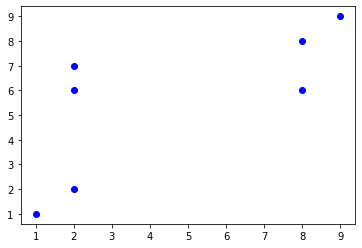

In [64]:
X = [[1, 1], [2, 2], [2, 6], [2, 7], [8, 6], [8, 8], [9, 9]]
x = [X[i][0] for i in range(len(X))]
y = [X[i][1] for i in range(len(X))]
plt.plot(x, y, 'bo')
#plt.plot(X, 'bo')
plt.show()

In [66]:
# teste da funcao kmeans()
X = [[1, 1], [2, 2], [2, 6], [2, 7], [8, 6], [8, 8], [9, 9]]
i, C, W = kmeans(X, 3, 20)
print('i =', i)
print('C =', C)
print('W =', W)

i = 2
C = [[1.5, 1.5], [2.0, 6.5], [8.333333333333334, 7.666666666666667]]
W = [[1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1]]


In [67]:
# teste da funcao kmeans() 3D
X = [[1, 1, 1], [2, 2, 2], [2, 6, 6], [2, 7, 7], [8, 6, 6], [8, 8, 8], [9, 9, 9]]
i, C, W = kmeans(X, k=3, max_it=20)
print('i =', i)
print('C =', C)
print('W =', W)

i = 3
C = [[1.5, 1.5, 1.5], [2.0, 6.5, 6.5], [8.333333333333334, 7.666666666666667, 7.666666666666667]]
W = [[1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1]]
